In [3]:
#Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Importing directories.

import PIL
from PIL import Image
import cv2
import numpy as np
import  matplotlib.pyplot as plt

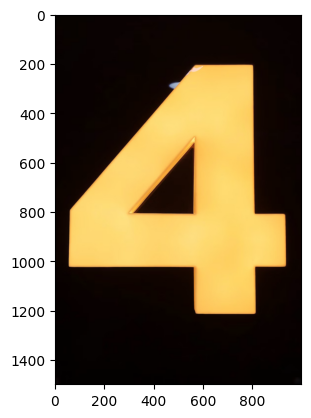

In [7]:
#Save Image Path
A = "/content/drive/MyDrive/Labs/Computer Vision/Number 4.jpeg"
B = "/content/drive/MyDrive/Labs/Computer Vision/Alphabet B.jpg"

#Read the image
img1 = cv2.imread(A)
img2 = cv2.imread(B)

#Call imshow() using plt object
plt.imshow(img1)

#Display the image
plt.show()


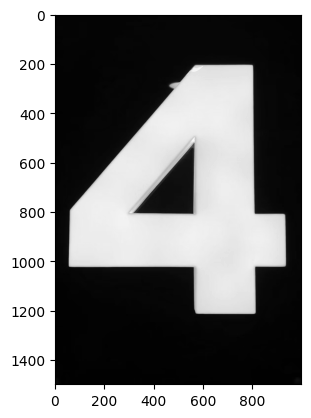

In [8]:
#Converting to GrayScale
gimg1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

#Plotting grayscale image with matplotlib
plt.imshow(gimg1, cmap = "gray")                 # cmap: Color Map

#Display Image
plt.show()


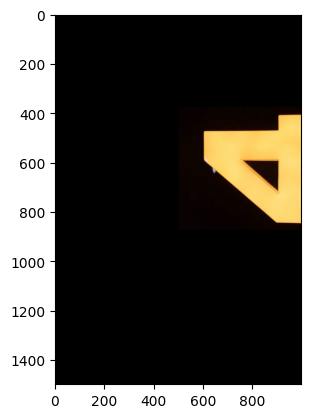

In [9]:
#Rotating the Image

#height and width of image
height, width = img1.shape[0:2]

Center = (height/2, width/2)
Angle = 90
Scale = 0.5

#Getting the Rotation Matrix
rotationMatrix = cv2.getRotationMatrix2D(Center, Angle, Scale)

#Rotating Image using warpAffine
rotatedImage = cv2.warpAffine(img1, rotationMatrix, (width, height))

plt.imshow(rotatedImage)
plt.show()


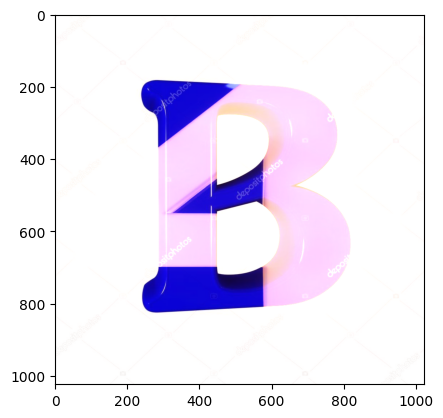

In [11]:
#Adding Images

img1 = cv2.resize(img1, (img2.shape[1],img2.shape[0]))

#Using cv2.add(x,y)
addedimg = cv2.add(img1, img2)

#Displaying Image
plt.imshow(addedimg)
plt.show()

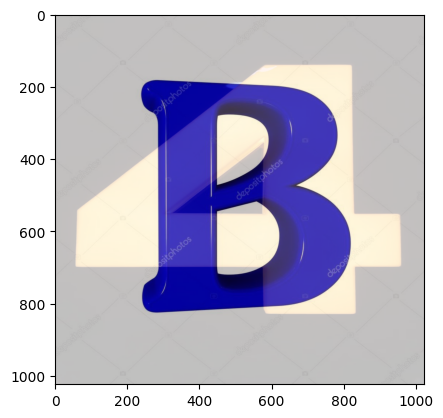

In [12]:
# WEIGHTED ADDITION
addedweightimg = cv2.addWeighted(img1,0.25,img2,0.75,0)
plt.imshow(addedweightimg)
plt.show()

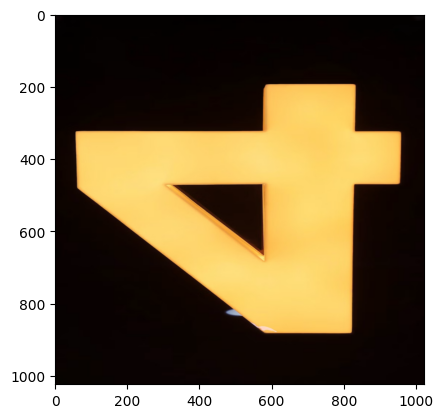

In [13]:
#Flipping Image

#Using cv2.flip(img, code)
flipped_img = cv2.flip(img1, 0)

#Displaying Image
plt.imshow(flipped_img)
plt.show()

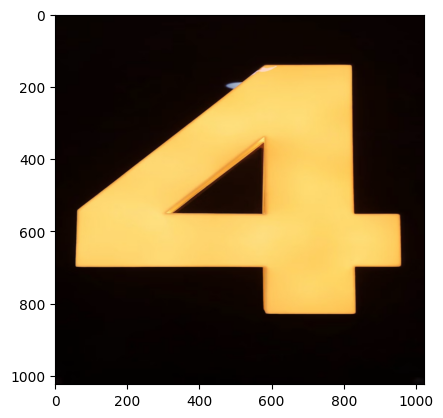

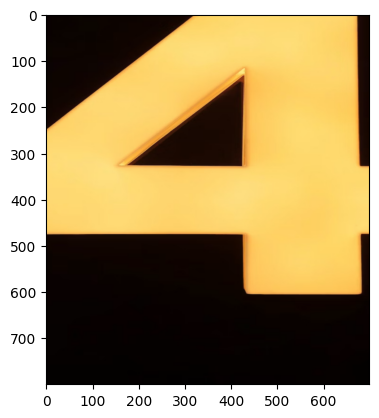

In [14]:
#Cropping the Image

#Getting the parameters
StartRow = int(height*.15)
StartCol = int(width*.15)
EndRow = int(height*.85)
EndCol = int(width*.85)

#Using the parameters

cropped_img = img1[StartRow:EndRow, StartCol:EndCol]

plt.imshow(img1)
plt.show()

plt.imshow(cropped_img)
plt.show()

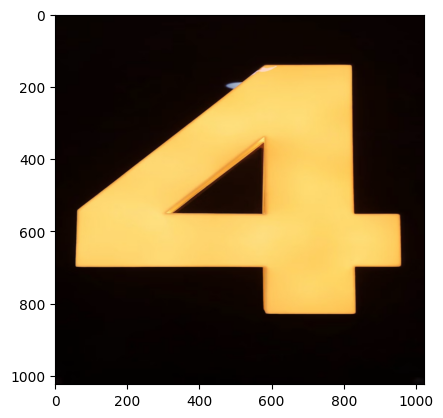

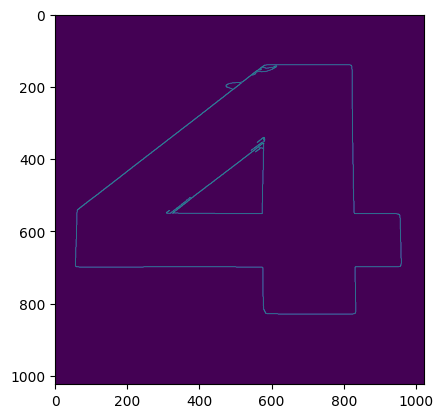

In [15]:
#Detecting Edges

#Using Canny Edge Detector as it is also known as the Optimal Detector
#Syntax = cv2.Canny(image, minVal, maxVal)
#minVal = Minimum Intensity Gradient Value      maxVal = Maximum Intensity Gradient Value

edge_img = cv2.Canny(img1, 100, 200)

plt.imshow(img1)
plt.show()

plt.imshow(edge_img)
plt.show()

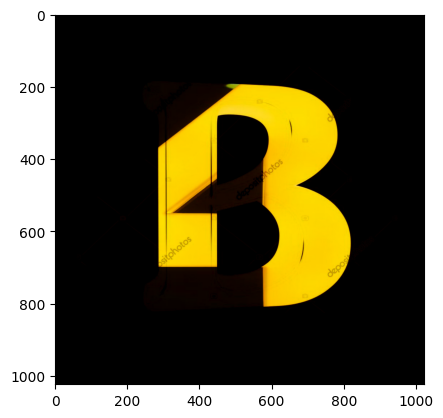

In [16]:
# SUBTRACTION
sub_img = cv2.subtract(img1, img2)
plt.imshow(sub_img)
plt.show()

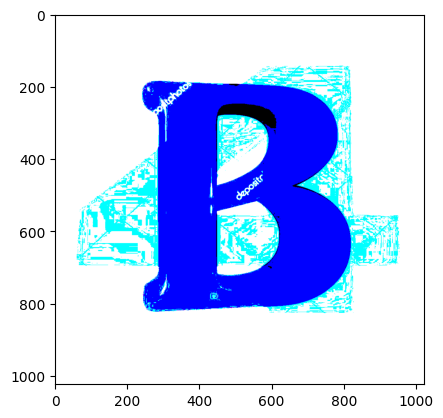

In [18]:
# SUBTRACTION (with range normalization)
sub_img = cv2.subtract(img2, img1)
sub_img = (sub_img - np.min(sub_img))/np.max(sub_img)*255
plt.imshow(sub_img)
plt.show()

**Q2. Write a program to add/subtract two images of your two-digit roll number.**

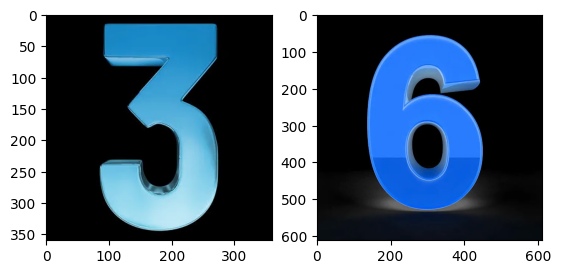

In [28]:
D3 = "/content/drive/MyDrive/Labs/Computer Vision/Digit 3.webp"
D6 = "/content/drive/MyDrive/Labs/Computer Vision/Digit 6.webp"

img1 = abs(255-cv2.imread(D3))
img2 = abs(255-cv2.imread(D6))
f, ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(img2)


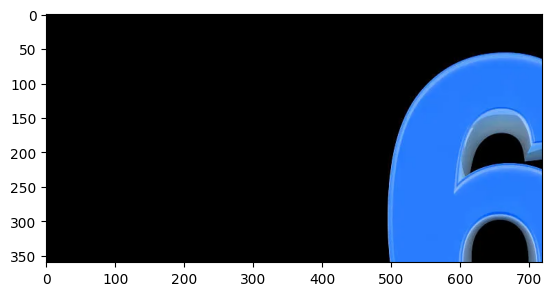

In [29]:
# Translating 2nd digit
M = np.float32([[1, 0, img1.shape[1]], [0, 1, 0]])
timg2 = cv2.warpAffine(img2, M, (2*img1.shape[1],img1.shape[0]))
plt.imshow(timg2)

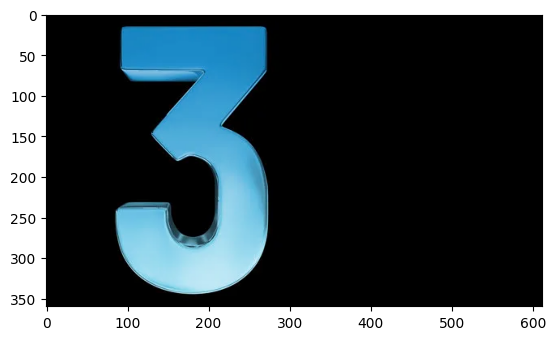

In [33]:
# Making size of images same
pad_width = img2.shape[1] - img1.shape[1]
img1 = np.pad(img1, ((0, 0), (0, pad_width), (0, 0)), mode='constant', constant_values=0)
plt.imshow(img1)

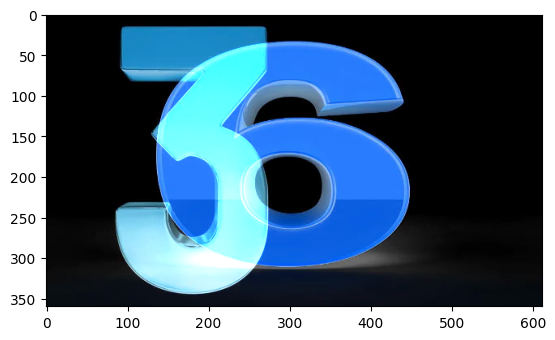

In [38]:
# Adding the two images

img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

rollno = cv2.add(img1, img2_resized)
plt.imshow(rollno)